<a href="https://colab.research.google.com/github/saadkarim754/Fake_News_classification/blob/main/DATASETTREANDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl nltk matplotlib wordcloud


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
file_path = "True.csv"  # Replace with your file path
data = pd.read_csv(file_path)

In [4]:
print(data.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [5]:
text_data = data['text']

In [6]:
stop_words = list(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
word_counts = vectorizer.fit_transform(text_data)

In [7]:
word_freq = word_counts.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

In [ ]:
freq_df = pd.DataFrame({'Word': vocab, 'Frequency': word_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

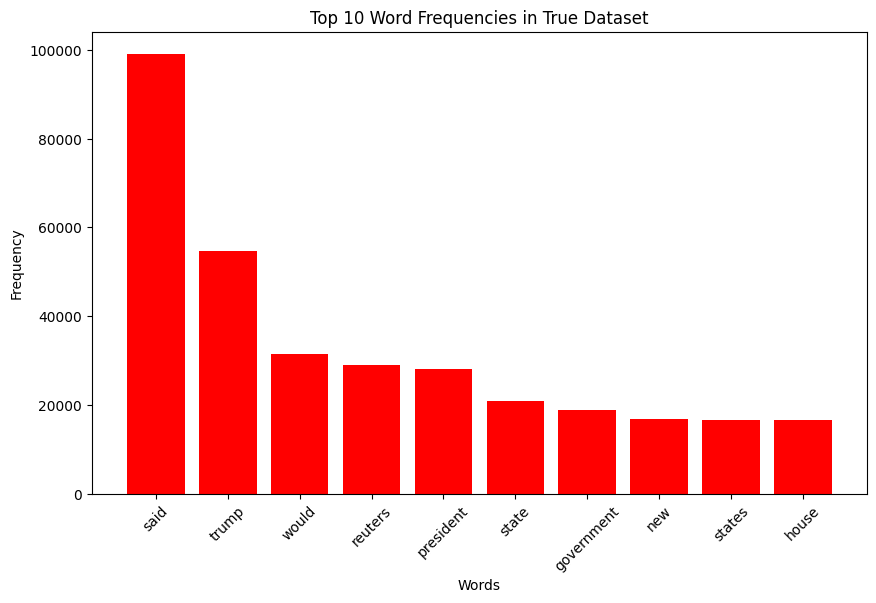

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(freq_df['Word'][:10], freq_df['Frequency'][:10], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies in True Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
file_path = "Fake.csv"  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [ ]:
text_data = data['text']

In [ ]:
stop_words = list(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
word_counts = vectorizer.fit_transform(text_data)

In [ ]:
word_freq = word_counts.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

In [ ]:
freq_df = pd.DataFrame({'Word': vocab, 'Frequency': word_freq})
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

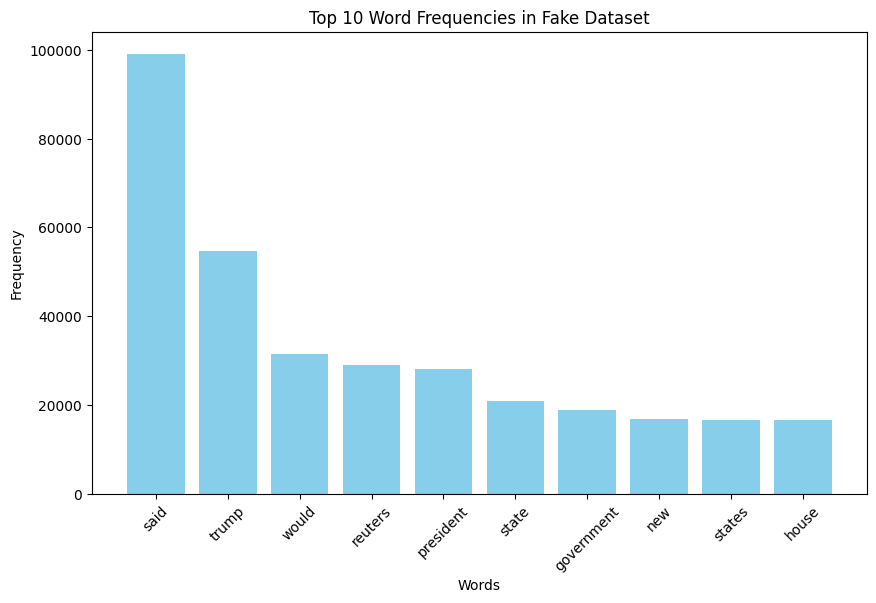

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(freq_df['Word'][:10], freq_df['Frequency'][:10], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies in Fake Dataset')
plt.xticks(rotation=45)
plt.show()

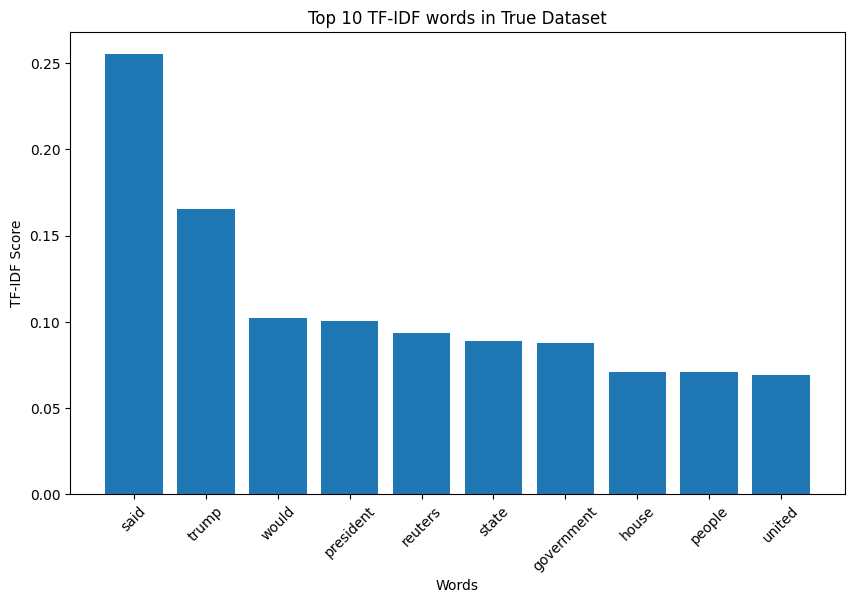

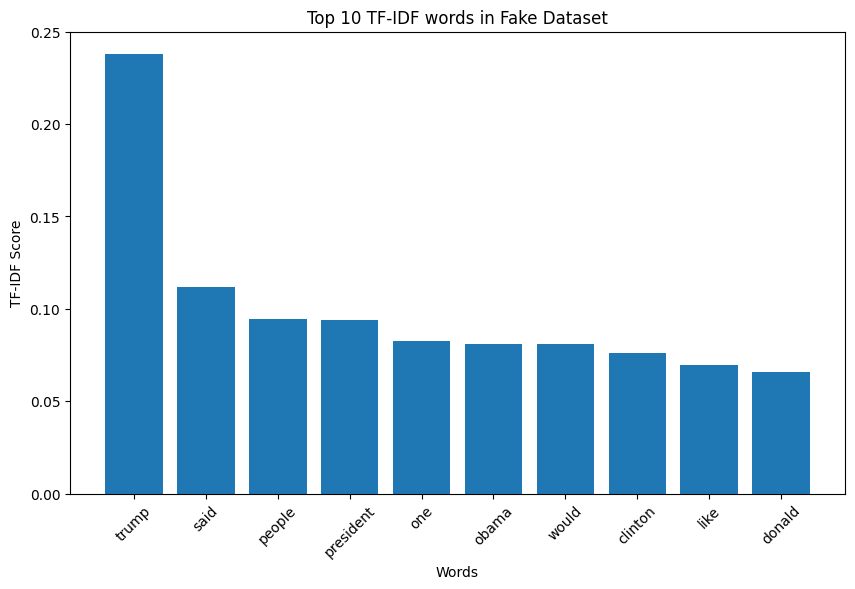

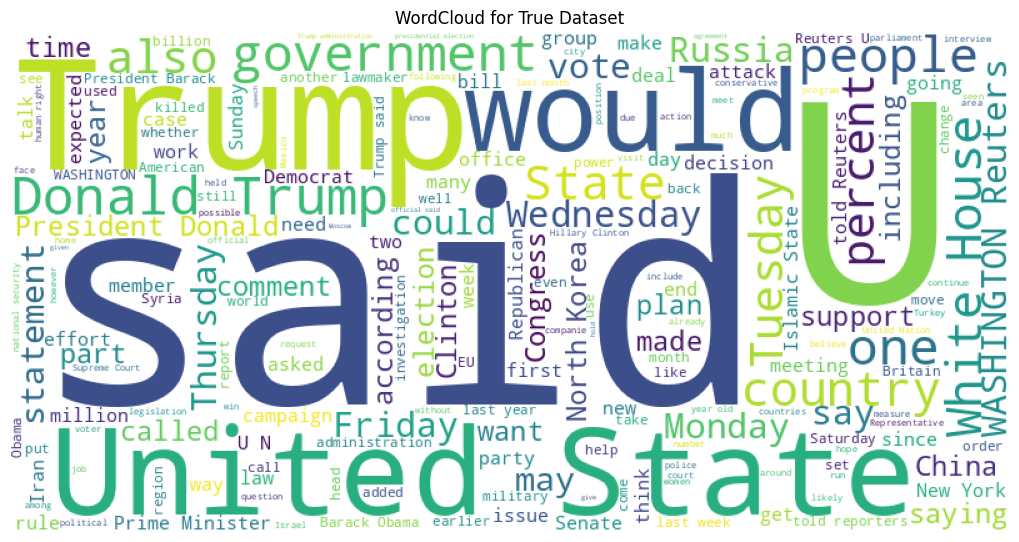

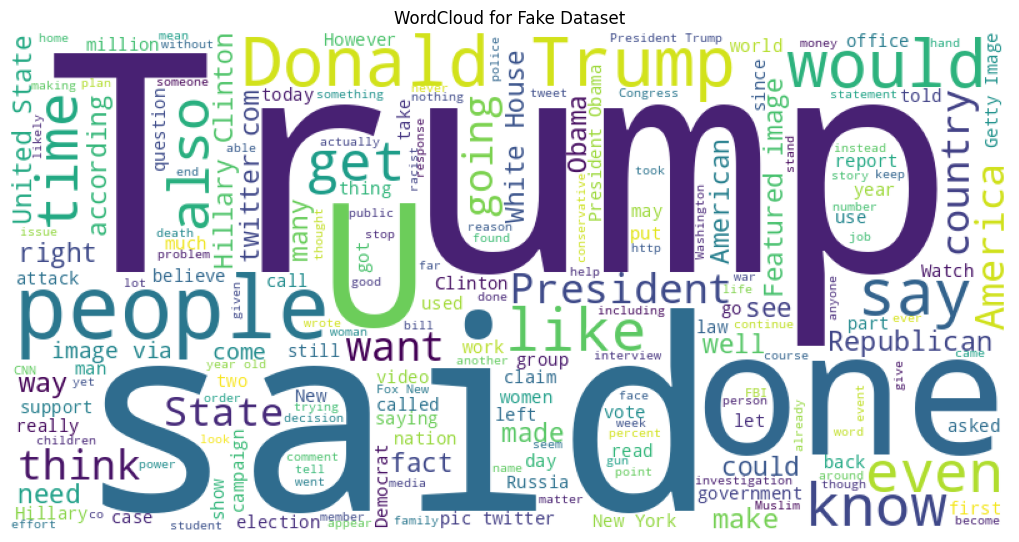

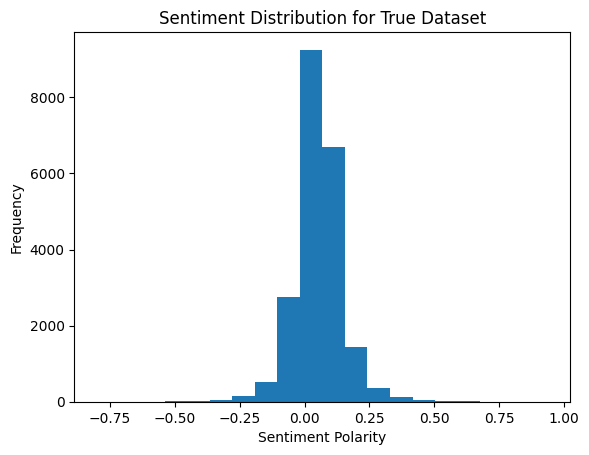

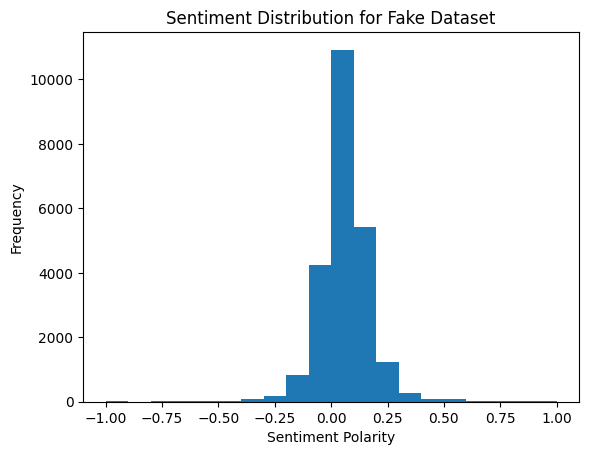

In [ ]:
# prompt: any other data analysis we can perform on this data?

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# ... (your existing code)

# TF-IDF Analysis
def analyze_tfidf(file_path, title):
    data = pd.read_csv(file_path)
    text_data = data['text']
    vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=50) # Limit features for better visualization
    tfidf_matrix = vectorizer.fit_transform(text_data)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    top_tfidf_words = tfidf_df.mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_tfidf_words.index, top_tfidf_words.values)
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Score")
    plt.title(f"Top 10 TF-IDF words in {title} Dataset")
    plt.xticks(rotation=45)
    plt.show()

analyze_tfidf("True.csv", "True")
analyze_tfidf("Fake.csv", "Fake")


# Word Cloud Visualization
def generate_wordcloud(file_path, title):
    data = pd.read_csv(file_path)
    text = " ".join(review for review in data['text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"WordCloud for {title} Dataset")
    plt.show()

generate_wordcloud("True.csv", "True")
generate_wordcloud("Fake.csv", "Fake")


# Sentiment Analysis (requires additional libraries like TextBlob or VADER)
# Install the necessary library
!pip install textblob

from textblob import TextBlob

def analyze_sentiment(file_path, title):
    data = pd.read_csv(file_path)
    data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.hist(data['sentiment'], bins=20)
    plt.title(f'Sentiment Distribution for {title} Dataset')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()


analyze_sentiment("True.csv", "True")
analyze_sentiment("Fake.csv", "Fake")